In [1]:
#import necessary libraries
import pandas as pd

In [2]:
#read in the data
df = pd.read_csv(
    'https://raw.githubusercontent.com/JD-DataScienceProjects/Careerera_Projects/main/ANXIETY.csv')

In [3]:
#view the data
df.head()

,Instructor,Final,Anxiety,Gender
0,A,35,93.552,Female
1,A,70,95.164,Male
2,A,70,83.880,Female
3,A,30,84.686,Male
4,A,92,82.268,Male


In [4]:
#describe the data
df.describe()

,Final,Anxiety
count,103.000000,103.000000
mean,59.757282,74.343670
std,23.185300,17.181858
min,10.000000,0.056000
25%,40.000000,69.775000
50%,65.000000,79.044000
75%,80.000000,84.686000
max,100.000000,97.582000


There is no missing data

In [5]:
#check for the skewness of the data
df.skew()

C:\Users\Spiddacino\AppData\Local\Temp\ipykernel_11340\447652273.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Final     -0.313777
Anxiety   -2.011744
dtype: float64

array([[<AxesSubplot:title={'center':'Final'}>,
        <AxesSubplot:title={'center':'Anxiety'}>]], dtype=object)

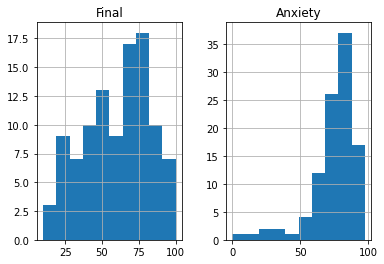

In [6]:
#check the distribution of the data
df.hist()

In [8]:
#view the size of the data
print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns')

The data has 103 rows and 4 columns


In [9]:
#check the data types
df.dtypes

Instructor     object
Final           int64
Anxiety       float64
Gender         object
dtype: object

In [10]:
#get general information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Instructor  103 non-null    object 
 1   Final       103 non-null    int64  
 2   Anxiety     103 non-null    float64
 3   Gender      103 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB


In [11]:
#check for missing values
df.isnull().sum()

Instructor    0
Final         0
Anxiety       0
Gender        0
dtype: int64

In [12]:
#get the 3rd n 4th record of the data
df.iloc[2:4]

,Instructor,Final,Anxiety,Gender
2,A,70,83.880,Female
3,A,30,84.686,Male


In [14]:
#view the records that are only of type object
df.select_dtypes(include=['object'])

,Instructor,Gender
0,A,Female
1,A,Male
2,A,Female
3,A,Male
4,A,Male
...,...,...
98,D,Female
99,D,Female
100,D,Male
101,D,Female


In [16]:
#create a data frame of those who failed using 50 as pass mark
df_failed = df[df['Final'] < 50]

In [17]:
#describe the data of those who failed
df_failed.describe()

,Final,Anxiety
count,30.000000,30.000000
mean,30.333333,82.187400
std,10.736124,6.545751
min,10.000000,67.760000
25%,20.000000,79.044000
50%,30.000000,82.268000
75%,40.000000,85.895000
max,49.000000,93.552000


Generally, based on the data for those who failed, 30 students failed the lowest and highest score were 10 and 45 respectively. they seem to have high anxiety between 67.76 to 93.55

In [18]:
#create a data frame of those who passed using 50 as pass mark
df_passed = df[df['Final'] >= 50]

In [19]:
#describe the data of those who passed
df_passed.describe()

,Final,Anxiety
count,73.000000,73.000000
mean,71.849315,71.120219
std,14.357220,19.099615
min,50.000000,0.056000
25%,60.000000,63.730000
50%,70.000000,75.014000
75%,80.000000,83.074000
max,100.000000,97.582000


The anxiety of those who passed range between 0.05 to 97.58.
there in no clear pattern of anxiety between those who passed and failed.

In [20]:
#describe dataframe of students that failed and are male gender
df_failed[df_failed['Gender'] == 'Male'].describe()

,Final,Anxiety
count,16.000000,16.000000
mean,34.000000,83.325875
std,10.583005,6.824675
min,10.000000,67.760000
25%,28.750000,81.462000
50%,40.000000,84.283000
75%,40.000000,87.104000
max,49.000000,93.552000


In [22]:
#describe dataframe of students that failed and are female
df_failed[df_failed['Gender'] ==  'Female'].describe()

,Final,Anxiety
count,14.000000,14.000000
mean,26.142857,80.886286
std,9.614549,6.198494
min,10.000000,71.790000
25%,20.000000,77.633500
50%,26.000000,81.462000
75%,30.000000,84.686000
max,45.000000,93.552000


In [24]:
#view a frequency table of intructors by gender
pd.crosstab(df['Instructor'], df['Gender'])

Gender,Female,Male
Instructor,,
A,14,19
B,15,19
C,12,8
D,10,6


In [25]:
#create a ratio column which is the ratio of the anxiety to the final score
df['Ratio'] = df['Anxiety'] / df['Final']

In [26]:
#view some of the data
df.head()

,Instructor,Final,Anxiety,Gender,Ratio
0,A,35,93.552,Female,2.672914
1,A,70,95.164,Male,1.359486
2,A,70,83.880,Female,1.198286
3,A,30,84.686,Male,2.822867
4,A,92,82.268,Male,0.894217


In [29]:
#describe the data around female students that failed including the ratio
df[(df['Final'] < 50) & (df['Gender'] == 'Female')].describe()

,Final,Anxiety,Ratio
count,14.000000,14.000000,14.000000
mean,26.142857,80.886286,3.582710
std,9.614549,6.198494,1.626683
min,10.000000,71.790000,1.738622
25%,20.000000,77.633500,2.684334
50%,26.000000,81.462000,2.895903
75%,30.000000,84.686000,4.073100
max,45.000000,93.552000,7.904400


In [30]:
#describe the data around male students that failed including the ratio
df[(df['Final'] < 50) & (df['Gender'] == 'Male')].describe()

,Final,Anxiety,Ratio
count,16.000000,16.000000,16.000000
mean,34.000000,83.325875,2.879495
std,10.583005,6.824675,1.666965
min,10.000000,67.760000,1.694000
25%,28.750000,81.462000,2.036550
50%,40.000000,84.283000,2.308575
75%,40.000000,87.104000,2.826990
max,49.000000,93.552000,8.388000


In [31]:
#describe the data around all students that failed including the ratio
df[df['Final'] < 50].describe()

,Final,Anxiety,Ratio
count,30.000000,30.000000,30.000000
mean,30.333333,82.187400,3.207662
std,10.736124,6.545751,1.658554
min,10.000000,67.760000,1.694000
25%,20.000000,79.044000,2.177600
50%,30.000000,82.268000,2.730430
75%,40.000000,85.895000,4.022725
max,49.000000,93.552000,8.388000


In [32]:
#describe the data around all students that passed including the ratio
df[df['Final'] >= 50].describe()

,Final,Anxiety,Ratio
count,73.000000,73.000000,73.000000
mean,71.849315,71.120219,1.049340
std,14.357220,19.099615,0.376254
min,50.000000,0.056000,0.000622
25%,60.000000,63.730000,0.849733
50%,70.000000,75.014000,1.048600
75%,80.000000,83.074000,1.279600
max,100.000000,97.582000,1.951640


In [33]:
#drop the ratio column
df.drop('Ratio', axis=1, inplace=True)

In [35]:
#view the average final scre and anxiety grouped by th instructor and gender
grouped = df.groupby(['Instructor', 'Gender'])
result = grouped[['Final', 'Anxiety']].mean()
result

Final    Anxiety
Instructor Gender                      
A          Female  47.785714  85.261714
           Male    56.263158  81.264211
B          Female  51.600000  78.614133
           Male    62.052632  77.177474
C          Female  62.666667  74.409500
           Male    63.750000  68.868250
D          Female  75.700000  52.365400
           Male    74.166667  51.102667

Skewness will be looked at as shown below

Skewness < -0.5 or > 0.5:  left and right skewed respectively

Skewness in between is considered to be symmetrical

In [37]:
#get the skewness of the data when grouped by the instructor
group1 = df.groupby(['Instructor'])
result1 = group1[['Final', 'Anxiety']].skew()
result1

,Final,Anxiety
Instructor,,
A,-0.082272,-4.054128
B,-0.121356,-0.274613
C,-0.395085,-0.224214
D,-0.902609,-0.392188


In [38]:
#get the skewness of the data when grouped by the instructor and gender
group1 = df.groupby(['Instructor', 'Gender'])
result1 = group1[['Final', 'Anxiety']].skew() 
result1


Final   Anxiety
Instructor Gender                    
A          Female -0.105304  0.047397
           Male   -0.033464 -3.265094
B          Female  0.128401 -0.410313
           Male   -0.358087 -0.204530
C          Female  0.141476  0.123320
           Male   -1.213628 -0.751749
D          Female -1.150456 -0.476629
           Male    0.388190  0.326773

Visualization of the data across the Instructors

In [43]:
#import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
subset_df_A = df[df['Instructor']=='A']
subset_df_B = df[df['Instructor']=='B']
subset_df_C = df[df['Instructor']=='C']
subset_df_D = df[df['Instructor']=='D']

Automating the EDA

In [44]:
#Create a function to automate our EDA

def describe_and_viz(subset_df, column_name, graph_title):
    stats = subset_df[column_name].describe().to_frame()
    stats.loc['skewness'] = subset_df[column_name].skew()

    #Create subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

    #Create the boxplot as left subplot
    sns.boxplot(x=column_name, data=subset_df, ax=ax1)
    ax1.set_title(f'Boxplot for {graph_title}')

    #Create the histogram as right subplot
    sns.histplot(x=column_name, data=subset_df, ax=ax2)
    ax2.set_title(f'Histogram for {graph_title}')

    print(stats)


            Anxiety
count     33.000000
mean      82.960121
std       14.681205
min       10.000000
25%       82.268000
50%       84.686000
75%       89.522000
max       97.582000
skewness  -4.054128


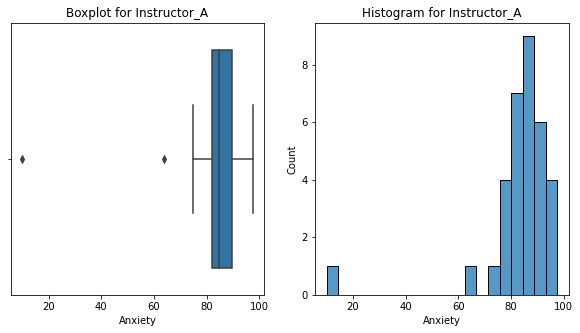

In [45]:
# visualize data for Instructor A
describe_and_viz(subset_df_A, 'Anxiety', 'Instructor_A')

            Anxiety
count     34.000000
mean      77.811294
std        7.545926
min       62.118000
25%       71.790000
50%       79.044000
75%       82.872500
max       91.134000
skewness  -0.274613


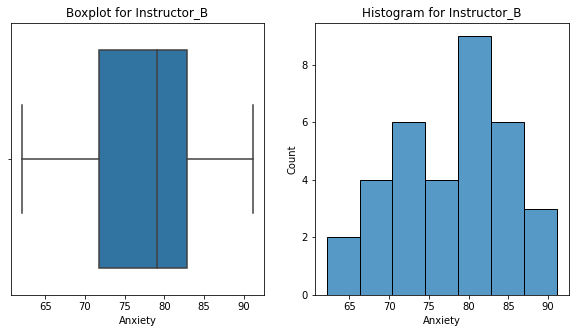

In [46]:
# visualize data for Instructor B
describe_and_viz(subset_df_B, 'Anxiety', 'Instructor_B')

            Anxiety
count     20.000000
mean      72.193000
std        9.269461
min       50.834000
25%       65.140500
50%       72.193000
75%       76.626000
max       89.522000
skewness  -0.224214


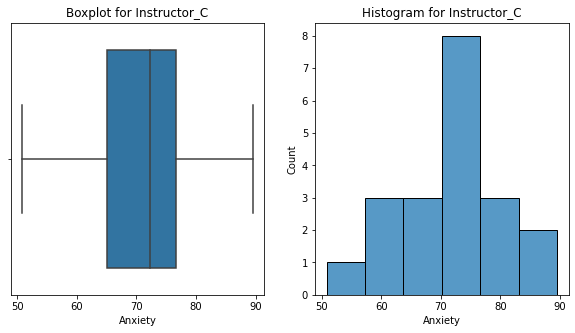

In [47]:
# visualize data for Instructor C
describe_and_viz(subset_df_C, 'Anxiety', 'Instructor_C')

            Anxiety
count     16.000000
mean      51.891875
std       24.064590
min        0.056000
25%       36.527500
50%       55.267000
75%       69.573500
max       95.970000
skewness  -0.392188


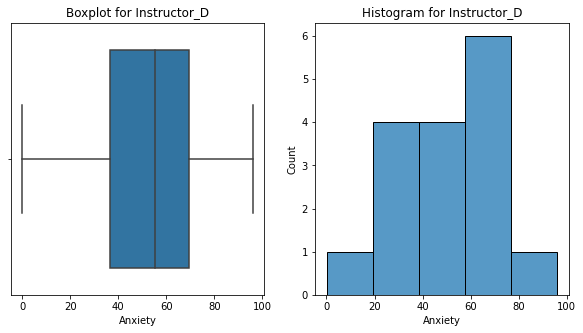

In [48]:
# visualize data for Instructor D
describe_and_viz(subset_df_D, 'Anxiety', 'Instructor_D')

From the analysis, the follow is deducted:
#1. Instructor A students have high anxiety and also generally have high scores and very little failure
#2. Instructor B students have average anxiety and also generally have all students passing
#3. Instructor C students have lower anxiety than B and also generally have all students passing
#4. Instructor D students have much lower anxiety than C but has a spread of students passing and failing with the highest number of failures though.

I would deduce that instructor D does not push his students and so they just pass throught the course without learning much. Instructor A is the best instructor as he pushes his students to the limit and they learn a lot and also have high scores.
Instructor A has a few failing, probably they couldn't cope with the anxiety.
Instructor B and C are average instructors as they have average anxiety and also have all students passing.